In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time 
import json
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from config import api_key

In [2]:
# Range of latitudes and longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for hold lat_lngs and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

639

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.

- Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set url for API
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# API reference for structure
response = requests.get(query_url + 'Shanghai')
data = response.json()
print(json.dumps(data, indent=2))

{
  "coord": {
    "lon": 121.4581,
    "lat": 31.2222
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 41.56,
    "feels_like": 30.15,
    "temp_min": 39.99,
    "temp_max": 43,
    "pressure": 1026,
    "humidity": 87
  },
  "visibility": 10000,
  "wind": {
    "speed": 15.66,
    "deg": 340
  },
  "clouds": {
    "all": 90
  },
  "dt": 1614619621,
  "sys": {
    "type": 1,
    "id": 9659,
    "country": "CN",
    "sunrise": 1614637219,
    "sunset": 1614678765
  },
  "timezone": 28800,
  "id": 1796236,
  "name": "Shanghai",
  "cod": 200
}


In [6]:
# Set empty lists to hold latitude, longitude and temperature
lat = []
lon = []
tmp_max = []
c_name = []
humidity = []
cloudiness = []
w_speed = []
country = []
date = []

record = 0
set_num = 1
# Loop through each city
print("Beginning Data Retrieval \n---------------------------")
for city in cities:
    # Create search query, make request and sotre in json
    url = query_url + city
    response = requests.get(url)
    data= response.json()
    
    # Try to grab the latitude, longitude and temperature 
    try:
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        tmp_max.append(data['main']['temp_max'])
        c_name.append(data['name'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        w_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        record += 1
        if record > 49:
            record = 0
            set_num +=1
        print(f"Processing Record {record} of Set {set_num}| {city} ")
    # Handle exceptions for a city that is not available in the API
    except:
        print(f"City not found. Skipping...")
        pass
    
print("---------------------------\n Data Retrieval Complete \n---------------------------")

Beginning Data Retrieval 
---------------------------
Processing Record 1 of Set 1| vaini 
Processing Record 2 of Set 1| saint george 
Processing Record 3 of Set 1| gladstone 
Processing Record 4 of Set 1| kupang 
Processing Record 5 of Set 1| imbituba 
Processing Record 6 of Set 1| hithadhoo 
Processing Record 7 of Set 1| barrow 
Processing Record 8 of Set 1| shingu 
Processing Record 9 of Set 1| bluff 
Processing Record 10 of Set 1| albany 
Processing Record 11 of Set 1| new norfolk 
Processing Record 12 of Set 1| bredasdorp 
Processing Record 13 of Set 1| kargil 
Processing Record 14 of Set 1| geraldton 
Processing Record 15 of Set 1| punta arenas 
Processing Record 16 of Set 1| port shepstone 
Processing Record 17 of Set 1| tiksi 
City not found. Skipping...
Processing Record 18 of Set 1| arlit 
Processing Record 19 of Set 1| coihaique 
City not found. Skipping...
Processing Record 20 of Set 1| vestmannaeyjar 
City not found. Skipping...
Processing Record 21 of Set 1| puerto ayora 

Processing Record 34 of Set 4| angouleme 
Processing Record 35 of Set 4| port hedland 
Processing Record 36 of Set 4| lac du bonnet 
Processing Record 37 of Set 4| lorengau 
Processing Record 38 of Set 4| west wendover 
Processing Record 39 of Set 4| chulym 
Processing Record 40 of Set 4| rio gallegos 
Processing Record 41 of Set 4| manggar 
Processing Record 42 of Set 4| padang 
Processing Record 43 of Set 4| mahebourg 
Processing Record 44 of Set 4| santa maria 
Processing Record 45 of Set 4| petropavlovsk-kamchatskiy 
City not found. Skipping...
Processing Record 46 of Set 4| east london 
Processing Record 47 of Set 4| hukuntsi 
Processing Record 48 of Set 4| chuy 
City not found. Skipping...
Processing Record 49 of Set 4| alofi 
Processing Record 0 of Set 5| zhezkazgan 
Processing Record 1 of Set 5| les cayes 
Processing Record 2 of Set 5| mathbaria 
Processing Record 3 of Set 5| mata 
City not found. Skipping...
Processing Record 4 of Set 5| namatanai 
Processing Record 5 of Set 5

Processing Record 19 of Set 8| thai binh 
Processing Record 20 of Set 8| waipawa 
Processing Record 21 of Set 8| digby 
Processing Record 22 of Set 8| lityn 
Processing Record 23 of Set 8| vila franca do campo 
Processing Record 24 of Set 8| selizharovo 
Processing Record 25 of Set 8| assiniboia 
Processing Record 26 of Set 8| san juan 
Processing Record 27 of Set 8| le port 
Processing Record 28 of Set 8| balsas 
Processing Record 29 of Set 8| belmonte 
Processing Record 30 of Set 8| naze 
Processing Record 31 of Set 8| taltal 
Processing Record 32 of Set 8| oparino 
Processing Record 33 of Set 8| gigmoto 
Processing Record 34 of Set 8| baruun-urt 
Processing Record 35 of Set 8| pacific grove 
Processing Record 36 of Set 8| pignon 
Processing Record 37 of Set 8| evensk 
Processing Record 38 of Set 8| havre 
Processing Record 39 of Set 8| darnah 
City not found. Skipping...
Processing Record 40 of Set 8| tubuala 
Processing Record 41 of Set 8| ekhabi 
Processing Record 42 of Set 8| cab

Processing Record 11 of Set 12| stupino 
City not found. Skipping...
Processing Record 12 of Set 12| mecca 
Processing Record 13 of Set 12| coos bay 
Processing Record 14 of Set 12| waddan 
Processing Record 15 of Set 12| negara 
Processing Record 16 of Set 12| talnakh 
Processing Record 17 of Set 12| nanortalik 
Processing Record 18 of Set 12| vanavara 
Processing Record 19 of Set 12| uyuni 
Processing Record 20 of Set 12| guarapuava 
Processing Record 21 of Set 12| adrar 
Processing Record 22 of Set 12| el tigre 
Processing Record 23 of Set 12| houma 
Processing Record 24 of Set 12| moose factory 
Processing Record 25 of Set 12| trairi 
Processing Record 26 of Set 12| ostrovnoy 
Processing Record 27 of Set 12| ilhabela 
Processing Record 28 of Set 12| mandalgovi 
Processing Record 29 of Set 12| niquelandia 
Processing Record 30 of Set 12| delcevo 
Processing Record 31 of Set 12| oyem 
Processing Record 32 of Set 12| vangaindrano 
Processing Record 33 of Set 12| quchan 
Processing Rec

## Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [7]:
# Create a dataframe with the data that was retrieved from the API
df = pd.DataFrame({'City':c_name,
                   'Latitude': lat,
                  'Longitude':lon,
                  'Max Temp': tmp_max,
                  'Humidity':humidity,
                  'Cloudiness':cloudiness,
                  'Wind Speed': w_speed,
                  'Country':country,
                  'Date':date})
df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.40,100,20,3.44,TO,1614619855
1,Saint George,37.1041,-113.5841,46.00,20,1,3.18,US,1614619852
2,Gladstone,-23.8500,151.2500,77.00,83,75,5.75,AU,1614619573
3,Kupang,-10.1667,123.5833,76.89,86,100,2.24,ID,1614619857
4,Imbituba,-28.2400,-48.6703,73.40,94,75,3.44,BR,1614619857
...,...,...,...,...,...,...,...,...,...
580,Oyem,1.5995,11.5793,71.40,94,64,4.07,GA,1614620176
581,Vangaindrano,-23.3500,47.6000,76.98,88,99,9.10,MG,1614620176
582,Qūchān,37.1060,58.5095,43.48,57,95,2.01,IR,1614620177
583,Nara,34.6851,135.8049,57.00,69,90,4.05,JP,1614620178


In [8]:
# save the dataframe into a csv
df.to_csv('output_data/cities.csv', index=False)

In [9]:
# Load the new csv into a dataframe
cities = pd.read_csv('output_data/cities.csv')
cities

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.40,100,20,3.44,TO,1614619855
1,Saint George,37.1041,-113.5841,46.00,20,1,3.18,US,1614619852
2,Gladstone,-23.8500,151.2500,77.00,83,75,5.75,AU,1614619573
3,Kupang,-10.1667,123.5833,76.89,86,100,2.24,ID,1614619857
4,Imbituba,-28.2400,-48.6703,73.40,94,75,3.44,BR,1614619857
...,...,...,...,...,...,...,...,...,...
580,Oyem,1.5995,11.5793,71.40,94,64,4.07,GA,1614620176
581,Vangaindrano,-23.3500,47.6000,76.98,88,99,9.10,MG,1614620176
582,Qūchān,37.1060,58.5095,43.48,57,95,2.01,IR,1614620177
583,Nara,34.6851,135.8049,57.00,69,90,4.05,JP,1614620178


In [10]:
# Display a summary statistics of your dataframe
cities.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,21.195505,18.345085,51.480188,71.977778,54.788034,8.379692,1.614620e+09
std,33.634449,90.829069,32.447935,21.454903,37.699826,6.002426,1.068865e+02
min,-54.800000,-179.166700,-41.800000,8.000000,0.000000,0.020000,1.614620e+09
25%,-7.938600,-61.895400,32.810000,61.000000,20.000000,4.030000,1.614620e+09
50%,26.914700,23.371600,61.000000,78.000000,66.000000,6.910000,1.614620e+09
75%,50.233400,98.634800,77.000000,88.000000,90.000000,11.430000,1.614620e+09
max,78.218600,179.316700,99.090000,100.000000,100.000000,34.520000,1.614620e+09


In [11]:
cities['Max Temp'].idxmin()

114

## Inspect the data and remove the cities where the humidty > 100%

In [12]:
cities[cities['Humidity'] > 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### There are none cities with humidty above 100%

## Plotting the Data

- Use proper labeling of the plot using plot titles (including date of analysis) and axes labels.

- Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

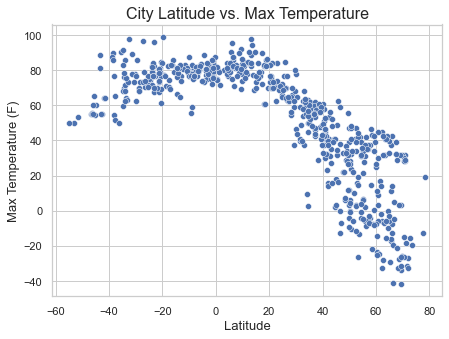

In [13]:
# Plot a scatterplot of Latitude vs Temperature
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Max Temp')

ax.set_title('City Latitude vs. Max Temperature', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Max Temperature (F)', fontsize=13)

plt.show()

We can observed that as Latitiude increases, Max Temperature decresases. Which makes sense, since cities located towards the north pole are now in winter or spring season while cities located to lower latitudes are now in summer which means higher/hotter temperatures.

## Latitude vs. Humidity Plot

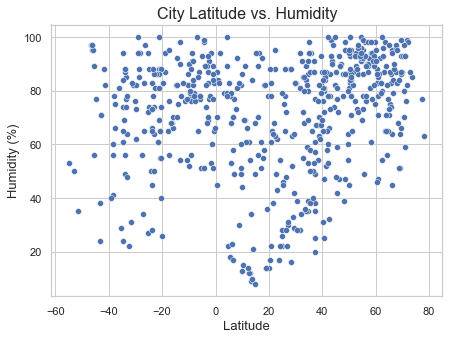

In [14]:
# Plot a scatterplot of Latitude vs Humidity
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Humidity')

ax.set_title('City Latitude vs. Humidity', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Humidity (%)', fontsize=13)

plt.show()

From this plot we can interpet that Humidity is almost at equal levels regardless of a higher o lower Latitude. Which probably means that there is not a very strong correlation between these two variables.  

## Latitude vs. Cloudiness Plot

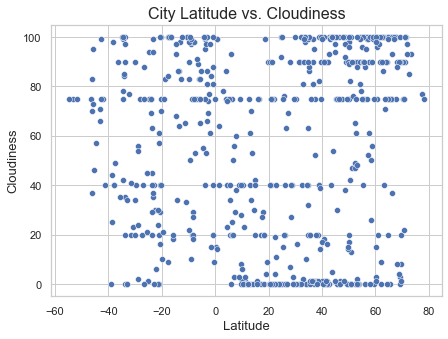

In [15]:
# Plot a scatterplot of Latitude vs Cloudiness
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Cloudiness')

ax.set_title('City Latitude vs. Cloudiness', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Cloudiness', fontsize=13)

plt.show()

By plotting the Latitude of a City vs Cloudiness we observed that some cities located between 0 and 40 degrees latitude have higher possibilites to have less cloudiness. 

## Latitude vs. Wind Speed Plot

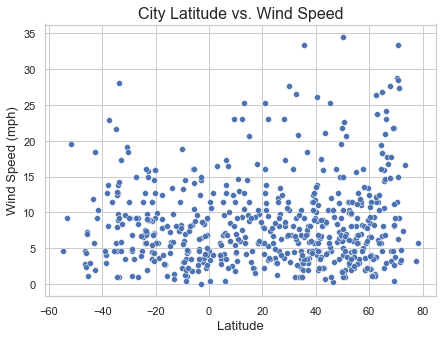

In [16]:
# Plot a scatterplot of Latitude vs Wind Speed
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=cities, x='Latitude', y='Wind Speed')

ax.set_title('City Latitude vs. Wind Speed', fontsize=16)
ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Wind Speed (mph)', fontsize=13)

plt.show()

Whith this plot we can see like the values of wind speed looks almost normally distributed regardless of the latitude of the city. 

## Linear Regression

In [17]:
# Split the dataset into Northern Hemisphere and Southern Hemisphere
northern_hemisphere = cities[cities['Latitude'] >= 0]
southern_hemisphere = cities[cities['Latitude'] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Perform a linear regression
x_vals_nlat = northern_hemisphere['Latitude']
y_vals_ntemp = northern_hemisphere['Max Temp']
(nht_slope, nht_intercept, nht_rvalue, nht_pvalue, nht_stderr) = linregress(x_vals_nlat, y_vals_ntemp)

# Create equation of line to calculate predicted value
nht_fit = nht_slope * x_vals_nlat + nht_intercept
line_eq = "y =" + str(round(nht_slope,2)) + "x + " + str(round(nht_intercept, 2))
print(line_eq)

y =-1.44x + 98.67


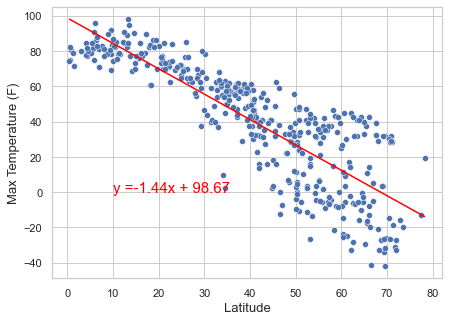

The r-value is: -0.85


In [19]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=northern_hemisphere, x='Latitude', y='Max Temp')
sns.lineplot(data= northern_hemisphere, x= x_vals_nlat, y= nht_fit, color='red')
plt.annotate(line_eq, (10,0), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Max Temperature (F)', fontsize=13)

plt.show()
print(f"The r-value is: {round(nht_rvalue,2)}")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
x_vals_slat = southern_hemisphere['Latitude']
y_vals_stemp = southern_hemisphere['Max Temp']

# Perform a linear regression
(sht_slope, sht_intercept, sht_rvalue, sht_pvalue, sht_stderr) = linregress(x_vals_slat, y_vals_stemp)

# Create equation of line to calculate predicted value
sht_fit = sht_slope * x_vals_slat + sht_intercept

line_eq_sht = "y =" + str(round(sht_slope,2)) + "x + " + str(round(sht_intercept,2))
print(line_eq_sht)

y =0.33x + 82.51


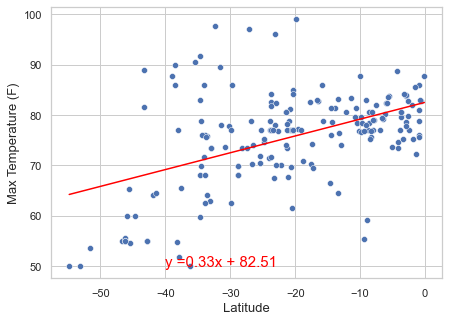

The r-value is 0.48


In [21]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(data=southern_hemisphere, x=x_vals_slat, y=y_vals_stemp)
sns.lineplot(data=southern_hemisphere,x= x_vals_slat, y=sht_fit, color='red')
plt.annotate(line_eq_sht, (-40,50), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Max Temperature (F)', fontsize=13)

plt.show()
print(f'The r-value is {round(sht_rvalue,2)}')

### Findings
- From the **Northern Hemisphere - Max Temperature vs Latitude Regression Model** we can observe that there is a strong negative relation between these two variables. Which is confirmed by looking at the **r-value coefficient which is: -0.85**. All this tell us that as Latitude increases Temperature will decrease. 


- From the **Southern Hemisphere - Max Temperature vs Latitude Regression Model** we can observe that there is a moderate positive relation between these two varibales. Which can be proved by looking at the **r-value which is 0.48**. All this information let us understand that as latitude increases the temperature does too which makes sense since every time cities are closer to the equator. However, when latitude decrease perhaps Max termperature is also decreasing but not as lower compared to the Northern Hemisphere Temperatures. This is explained because by the moment of doing this analysis Southern Hemisphere season is warmer thatn the Northern Hemisphere

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
x_vals_nlat = northern_hemisphere['Latitude']
y_vals_nhum = northern_hemisphere['Humidity']

# Perform a linear regression
(nhh_slope, nhh_intercept, nhh_rvalue, nhh_pvalue, nhh_stderr) = linregress(x_vals_nlat, y_vals_nhum)

# Create equation of line to calculate predicted value
nhh_fit = nhh_slope * x_vals_nlat + nhh_intercept

line_eq_nhh = 'y =' + str(round(nhh_slope, 2)) + 'x + ' + str(round(nhh_intercept,2))
line_eq_nhh

'y =0.5x + 50.81'

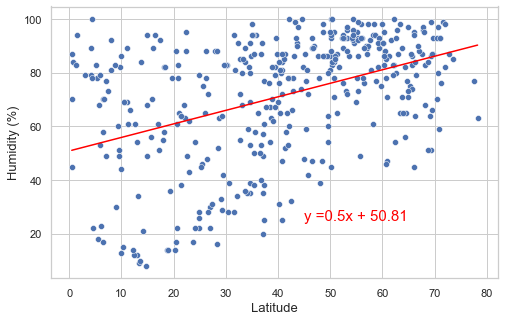

The r-value is 0.43


In [23]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(data=northern_hemisphere, x= x_vals_nlat, y= y_vals_nhum)
sns.lineplot(data=northern_hemisphere, x= x_vals_nlat, y=nhh_fit, color='red')
plt.annotate(line_eq_nhh, (45,25), color='red', fontsize=15)

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Humidity (%)', fontsize=13)

plt.show()
print(f'The r-value is {round(nhh_rvalue,2)}')

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
x_vals_slat = southern_hemisphere['Latitude']
y_vals_shum = southern_hemisphere['Humidity']

# Perform the linear regression
(shh_slope, shh_intercept, shh_rvalue, shh_pvalue, shh_stderr) = linregress(x_vals_slat, y_vals_shum)

# Create equation of line to calculate predicted value
shh_fit = shh_slope*x_vals_slat + shh_intercept

line_eq_shh = 'y =' + str(round(shh_slope, 2)) + 'x + ' + str(round(shh_intercept, 2))

line_eq_shh

'y =0.3x + 79.71'

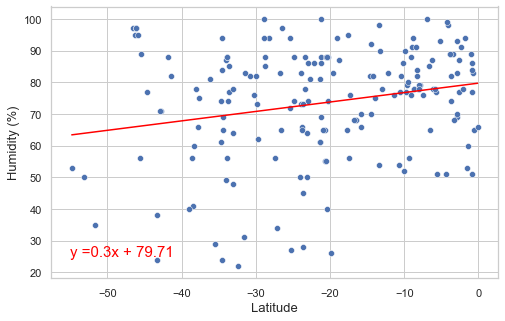

The r-value is 0.23


In [25]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(data=southern_hemisphere, x= x_vals_slat, y=y_vals_shum)
sns.lineplot(data=southern_hemisphere, x=x_vals_slat, y= shh_fit, color='red')
plt.annotate(line_eq_shh, (-55,25), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Humidity (%)', fontsize=13)

plt.show()
print(f'The r-value is {round(shh_rvalue,2)}')

### Findings
- From the **Northern Hemisphere - Humidity(%) vs Latitude Regression Model** we can observe that there is a moderate positive relation between these two variables. Which is confirmed by looking at the **r-value coefficient which is: 0.43**. All this tell us that as Latitude increases Humidity(%) will probably increase along. 


- From the **Southern Hemisphere - Humidity(%) vs Latitude Regression Model** we can observe that there is a weak positive relation between these two varibales. Which can be proved by looking at the **r-value which is 0.23**. All this information let us understand that latitude may not be a good variable to predict Humidity (%) since the relationship between these two varibales is weak our linear model will not be very confident on predicting Humidity (%).

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
x_vals_nlat = northern_hemisphere['Latitude']
y_vals_nclo = northern_hemisphere['Cloudiness']

# Perform the linear regression
(nclo_slope, nclo_intercept, nclo_rvalue, nclo_pvalue, nclo_stderr) = linregress(x_vals_nlat, y_vals_nclo)

# Create equation of line to calculate predicted value
nclo_fit = nclo_slope * x_vals_nlat + nclo_intercept

line_eq_nclo = 'y =' + str(round(nclo_slope, 2)) + 'x + ' + str(round(nclo_intercept, 2))

print(line_eq_nclo)

y =0.68x + 24.53


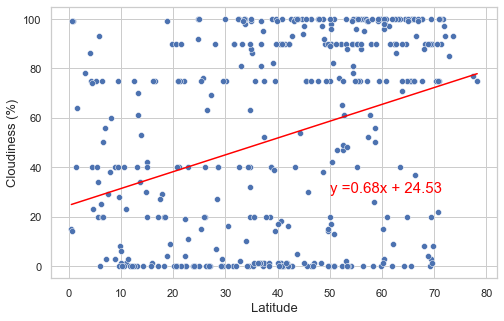

The r-value is 0.33


In [27]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(data=northern_hemisphere, x= x_vals_nlat, y=y_vals_nclo)
sns.lineplot(data=northern_hemisphere, x=x_vals_nlat, y=nclo_fit, color='red')
plt.annotate(line_eq_nclo, (50,30), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Cloudiness (%)', fontsize=13)

plt.show()
print(f'The r-value is {round(nclo_rvalue,2)}')

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
x_vals_slat = southern_hemisphere['Latitude']
y_vals_sclo = southern_hemisphere['Cloudiness']

# Perform the linear regression
(sclo_slope, sclo_intercept, sclo_rvalue, sclo_pvalue, sclo_stderr) = linregress(x_vals_slat, y_vals_sclo)

# Create equation of line to calculate predicted value
sclo_fit = sclo_slope * x_vals_slat + sclo_intercept

line_eq_sclo = 'y =' + str(round(sclo_slope)) + 'x + ' + str(round(sclo_intercept))

print(line_eq_sclo)

y =0x + 67


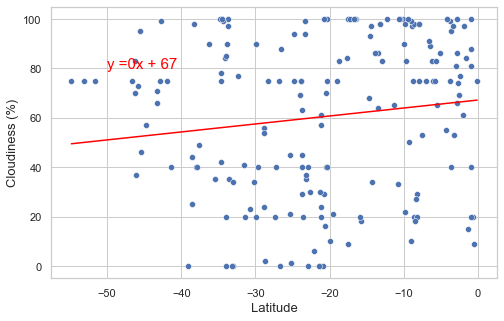

The r-value is 0.14


In [29]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(data=southern_hemisphere, x= x_vals_slat, y=y_vals_sclo)
sns.lineplot(data=southern_hemisphere, x= x_vals_slat, y=sclo_fit, color='red')
plt.annotate(line_eq_sclo, (-50,80), fontsize=15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Cloudiness (%)', fontsize=13)

plt.show()
print(f'The r-value is {round(sclo_rvalue,2)}')

### Findings
- From the **Northern Hemisphere - Cloudiness vs Latitude Regression Model** we can observe that there is roughly moderate positive relation between these two variables. Which is confirmed by looking at the **r-value coefficient which is: 0.33**. All this tell us that as Latitude increases Cloudiness (%) will probably increase along, however it seems that Latitude is not a good varibale to predict Cloudiness.


- From the **Southern Hemisphere - Cloudiness vs Latitude Regression Model** we can observe that there is a weak positive relation between these two varibales. Which can be proved by looking at the **r-value which is 0.14**. All this information let us understand that latitude may not be a good variable to predict Cloudiness (%) since the relationship between these two varibales is weak our linear model will not be very confident on predicting Cloudiness (%), similar to what happened in the Northern Hemisphere Linear Regression.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
x_vals_slat = northern_hemisphere['Latitude']
y_vals_nws = northern_hemisphere['Wind Speed']

# Perform the linear regression
(nws_slope, nws_intercept, nws_rvalue, nws_pvalue, nws_stderr) = linregress(x_vals_slat, y_vals_nws)

nws_fit = nws_slope * x_vals_nlat + nws_intercept

line_eq_nws = 'y =' + str(round(nws_slope, 2)) + 'x + ' + str(round(nws_intercept))

line_eq_nws

'y =0.03x + 7'

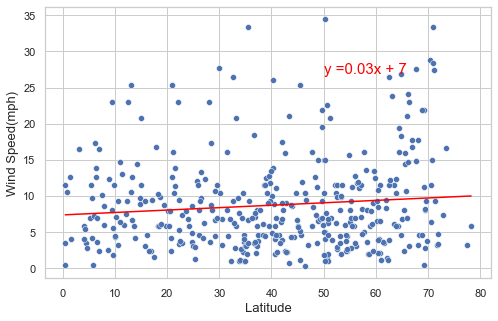

The r-value is 0.1


In [31]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(data=northern_hemisphere, x= x_vals_nlat, y= y_vals_nws)
sns.lineplot(data=northern_hemisphere, x= x_vals_nlat, y= nws_fit, color='red')
plt.annotate(line_eq_nws, (50, 27), fontsize = 15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Wind Speed(mph)', fontsize=13)

plt.show()
print(f'The r-value is {round(nws_rvalue,2)}')

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [32]:
x_vals_slat = southern_hemisphere['Latitude']
y_vals_sws = southern_hemisphere['Wind Speed']

# Perform the linear regression
(sws_slope, sws_intercept, sws_rvalue, sws_pvalue, sws_stderr) = linregress(x_vals_slat, y_vals_sws)

sws_fit = sws_slope * x_vals_slat + sws_intercept

line_eq_sws = 'y =' + str(round(sws_slope, 2)) + 'x + ' + str(round(sws_intercept))

line_eq_sws

'y =-0.07x + 6'

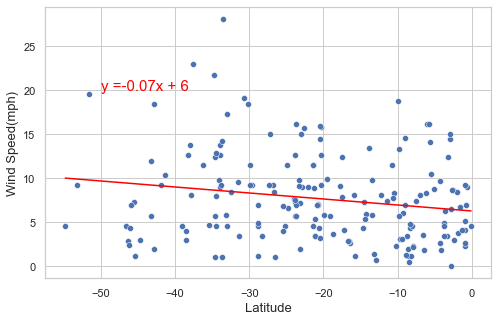

The r-value is -0.19


In [33]:
# Plot the linear regression into the scatter plot
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(data= southern_hemisphere, x= x_vals_slat, y= y_vals_sws)
sns.lineplot(data=southern_hemisphere, x= x_vals_slat, y= sws_fit, color='red')
plt.annotate(line_eq_sws, (-50, 20), fontsize = 15, color='red')

ax.set_xlabel('Latitude', fontsize=13)
ax.set_ylabel('Wind Speed(mph)', fontsize=13)

plt.show()
print(f'The r-value is {round(sws_rvalue,2)}')

### Findings
- From the **Northern Hemisphere - Wind Speed (mph) vs Latitude Regression Model** we can observe that there is weak positive relation between these two variables. Which is confirmed by looking at the **r-value coefficient which is: 0.1**. All this tell us that as Latitude increases Wind Speed (mph) will probably roughly increase, however it seems that Latitude is not a good varibale to predict Wind Speed (mph).


- From the **Southern Hemisphere - Wind Speed (mph) vs Latitude Regression Model** we can observe that there is a weak negative relation between these two varibales. Which can be proved by looking at the **r-value which is 0.19**. All this information let us understand that latitude may not be a good variable to predict Wind speed (mph) since the relationship between these two varibales is weak our linear model will not be very confident on predicting Wind speed (mph). 

However, although both models are not good in predicting Wind Speed (mph) is very interesting how does the relationship between the two variables change according to the Hemisphere they belong to. 